In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
Scorecard = pd.read_csv("~\\Documents\\NYCDSA\\First Project\\Git_Workspace\\College_Scorecard_Data\\Data\\Trimmed_Scorecard.csv")
Scorecard

,UNITID,OPEID,OPEID6,INSTITUTION,CITY,STATE,ZIP,INSTITUTION AWARD,IS MAIN,NUMBRANCH,...,IRPS_HISP,IRPS_NHPI,IRPS_NRA,IRPS_UNKN,IRPS_WHITE,IRPS_WOMEN,IRPS_MEN,MD_EARN_WNE_4YR,CONTROL_PEPS,ADM_RATE_SUPP
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,3.0,1,1,...,0.0000,0.0000,0.0758,0.0095,0.1469,0.5024,0.4976,46562.0,Public,0.716
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,1,...,0.0319,0.0012,0.0569,0.0004,0.6808,0.4433,0.5567,52404.0,Public,0.8854
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,3.0,1,1,...,0.0000,0.0000,0.0000,0.0000,0.9706,0.1471,0.8529,45765.0,Private Nonprofit,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,1,...,0.0256,0.0000,0.0484,0.0000,0.6809,0.4644,0.5356,67695.0,Public,0.7367
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,3.0,1,1,...,0.0136,0.0000,0.0000,0.0090,0.2127,0.4796,0.5204,37551.0,Public,0.9799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538,49576720,332918.0,3329.0,Pennsylvania State University-Penn State York,York,PA,17403-3326,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN
6539,49576721,332919.0,3329.0,Pennsylvania State University-Penn State Great...,Malvern,PA,19355-1488,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN
6540,49576722,332920.0,3329.0,Pennsylvania State University-Penn State Harri...,Middletown,PA,17057-4846,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN
6541,49576723,332921.0,3329.0,Pennsylvania State University-Penn State Brand...,Media,PA,19063-5522,NaN,0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63258.0,Public,NaN


In [31]:
#RET_FT4_POOLED is our most important X variable (RET_PT4_POOLED is the part-time retention pooled, 
#C100_4_POOLED is those who completed within 100% of the expected time,
#C150_4_POOLED is those who completed within 150% of the expected time,
#C150_4_NOLOANNOPELL " " but they recieved no loans of any sort,
#C150_4_LOANNOPELL " " but they recieved a loan and no PELL, 
#C150_4_PELL " " but they recieved only the PELL, 
#C200_4_POOLED is those who completed within 200% of the expected time,
#Potential Y's: PCTFLOAN is Percent of Full-time, First-time Undergraduates Receiving Federal Loans
#FTFTPCTFLOAN is the borrowing rate
#FTFTPCTPELL are those who recieved PELL grants
#CDR3 is three-year Cohort Default Rate 
#DEBT_MDN_SUPP is median debt as supplied by the school
#GRAD_DEBT_MDN_SUPP is graduate median debt as supplied by the school 
#POVERTY_RATE
#UNEMP_RATE
#AVGFAMINC family income of students and FAMINC_IND individual income of students 
#Cost_Without_Aid tuition cost without aid 
#Cost_With_Aid tuition cost with aid



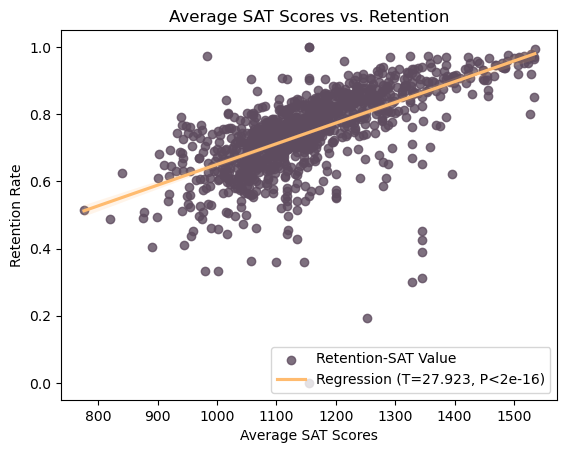

In [32]:
Scorecard_NA = Scorecard_NA[Scorecard_NA.SAT_AVG_ALL != 'PrivacySuppressed']
Scorecard_NA['UG25ABV'] = Scorecard_NA['UG25ABV'].astype(float)
sns.regplot(x=Scorecard_NA["SAT_AVG_ALL"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#5e4c5f"}, line_kws={"color": "#ffbb6f"}).set(
    title="Average SAT Scores vs. Retention", xlabel='Average SAT Scores', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-SAT Value","Regression (T=27.923, P<2e-16)"])
plt.savefig('SATscores.png')

C:\Users\immed\AppData\Local\Temp\ipykernel_18420\2876739161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scorecard_NA['AVGFAMINC'] = Scorecard_NA['AVGFAMINC'].astype(float)


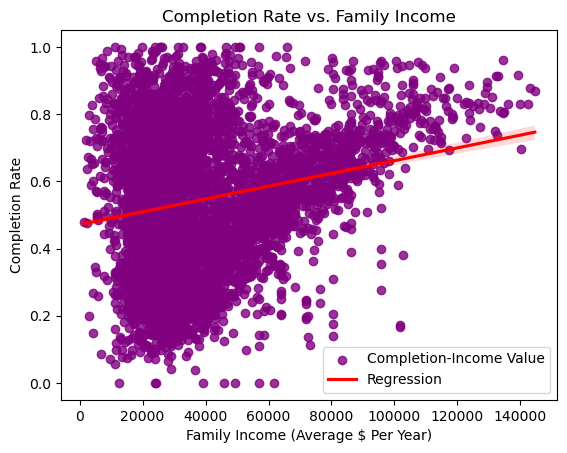

In [33]:
Scorecard_NA = Scorecard[Scorecard.AVGFAMINC != 'PrivacySuppressed']
Scorecard_NA['AVGFAMINC'] = Scorecard_NA['AVGFAMINC'].astype(float)
Scorecard_NA = Scorecard_NA[Scorecard_NA.FAMINC_IND != 'PrivacySuppressed']
Scorecard_NA['FAMINC_IND'] = Scorecard_NA['FAMINC_IND'].astype(float)
sns.regplot(x=Scorecard_NA["AVGFAMINC"], y=Scorecard_NA["C150_4_POOLED"],
            scatter_kws={"color": "purple"}, line_kws={"color": "red"}).set(
    title="Completion Rate vs. Family Income", xlabel='Family Income (Average $ Per Year)', ylabel='Completion Rate')
plt.legend(loc ="lower right", labels=["Completion-Income Value","Regression"])

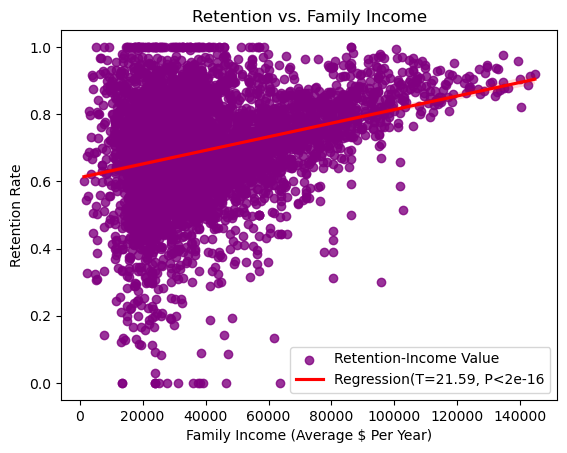

In [34]:
sns.regplot(x=Scorecard_NA["AVGFAMINC"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "purple"}, line_kws={"color": "red"}).set(
    title="Retention vs. Family Income", xlabel='Family Income (Average $ Per Year)', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Income Value", "Regression(T=21.59, P<2e-16"])
plt.savefig('FamilyIncome.png')

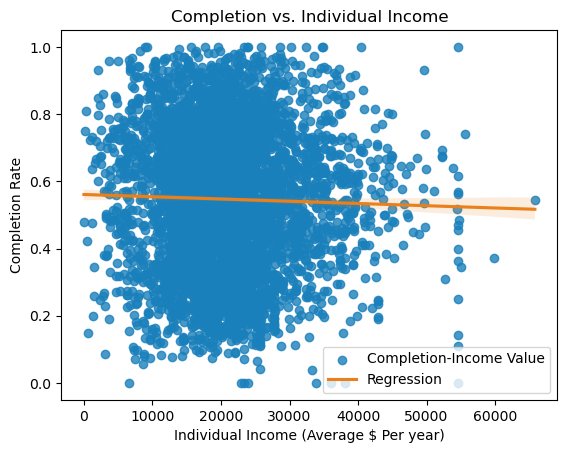

In [35]:
sns.regplot(x=Scorecard_NA["FAMINC_IND"], y=Scorecard_NA["C150_4_POOLED"],
            scatter_kws={"color": "#1a80bb"}, line_kws={"color": "#ea801c"}).set(
    title="Completion vs. Individual Income", xlabel='Individual Income (Average $ Per year)', ylabel='Completion Rate')
plt.legend(loc ="lower right", labels=["Completion-Income Value","Regression"])

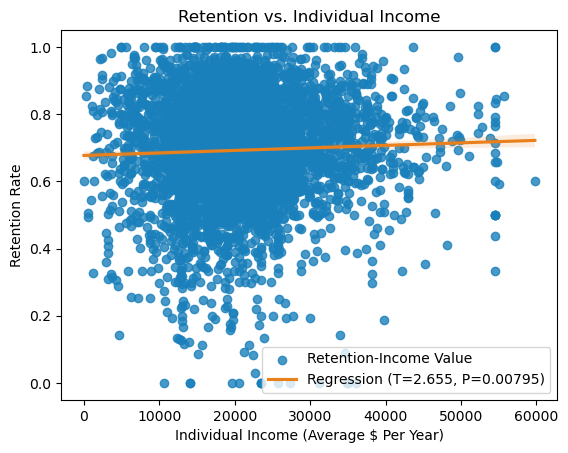

In [36]:
sns.regplot(x=Scorecard_NA["FAMINC_IND"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#1a80bb"}, line_kws={"color": "#ea801c"}).set(
    title="Retention vs. Individual Income", xlabel='Individual Income (Average $ Per Year)', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Income Value","Regression (T=2.655, P=0.00795)"])
plt.savefig('IndividualIncome.png')

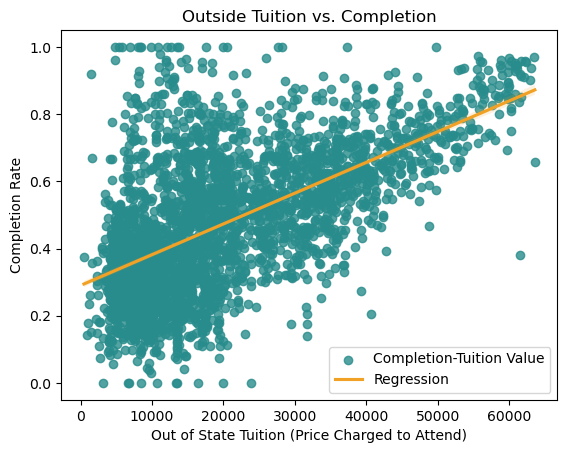

In [37]:
sns.regplot(x=Scorecard_NA["Outstate_Tuition"], y=Scorecard_NA["C150_4_POOLED"],
            scatter_kws={"color": "#298c8c"}, line_kws={"color": "#f1a226"}).set(
    title="Outside Tuition vs. Completion", xlabel='Out of State Tuition (Price Charged to Attend)', ylabel='Completion Rate')
plt.legend(loc ="lower right", labels=["Completion-Tuition Value","Regression"])

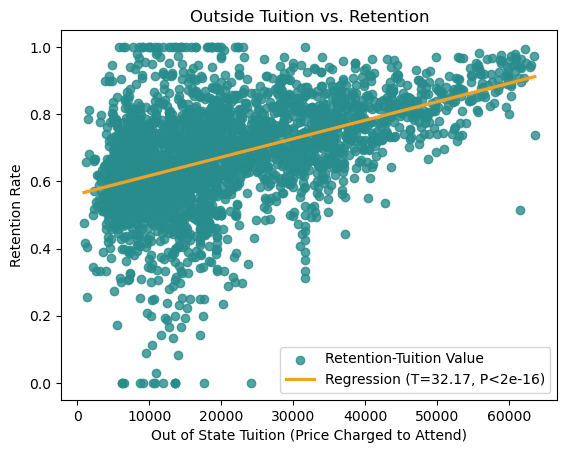

In [38]:
sns.regplot(x=Scorecard_NA["Outstate_Tuition"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#298c8c"}, line_kws={"color": "#f1a226"}).set(
    title="Outside Tuition vs. Retention", xlabel='Out of State Tuition (Price Charged to Attend)', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Tuition Value","Regression (T=32.17, P<2e-16)"])
plt.savefig('OutsideTuition.png')

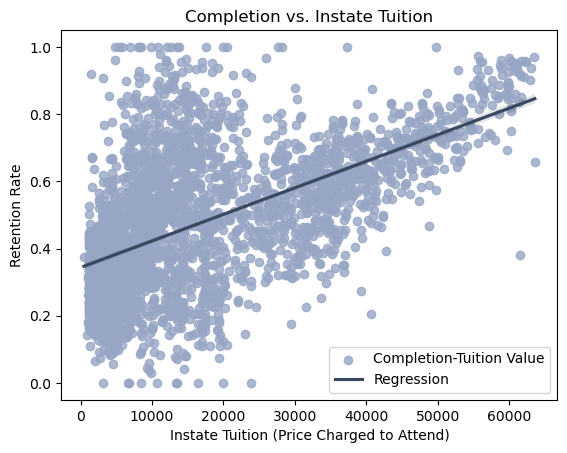

In [39]:
sns.regplot(x=Scorecard_NA["Instate_Tuition"], y=Scorecard_NA["C150_4_POOLED"],
            scatter_kws={"color": "#97a6c4"}, line_kws={"color": "#384860"}).set(
    title="Completion vs. Instate Tuition", xlabel='Instate Tuition (Price Charged to Attend)', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Completion-Tuition Value","Regression"])

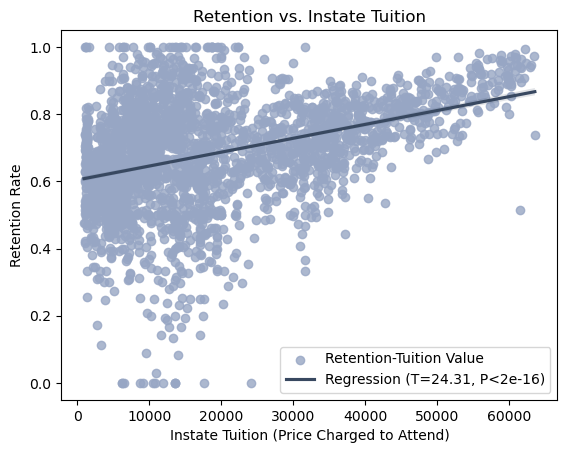

In [40]:
sns.regplot(x=Scorecard_NA["Instate_Tuition"], y=Scorecard_NA["RET_FT4_POOLED"],
            scatter_kws={"color": "#97a6c4"}, line_kws={"color": "#384860"}).set(
    title="Retention vs. Instate Tuition", xlabel='Instate Tuition (Price Charged to Attend)', ylabel='Retention Rate')
plt.legend(loc ="lower right", labels=["Retention-Tuition Value","Regression (T=24.31, P<2e-16)"])
plt.savefig('InstateTuition.png')